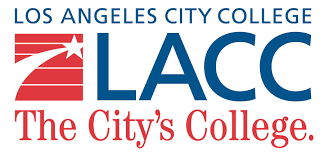

<font color=Blue>**Math 229: Statistics for Data Science**</font>
 
 <font color=Blue>**Professor: Edward Pineda-Castro**</font>
 
  <font color=Blue>**Los Angeles City College**</font>

# Our first Project
**In Lab2: Table Operations**

**We learned how to import a module and practice table operations.**

In [7]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Used_Car.csv')

# View the first few rows of the DataFrame
print("First 5 rows:")
print(df.head())


First 5 rows:
      Price  Mileage  Year               Honda.Type Condition
0  $18,999     18132  2017              Civic Sedan      Good
1  $23,700      8230  2019                 Civic-LX  Like New
2  $22,911     29962  2018  Honda Civic Sedan 4 dr       Good
3  $26,988     19501  2019          Civic Hatchback  Like New
4  $28,000      5641  2012          Civic Hatchback  Like New


**Lab 3: Fuctions and Visializations**

**We learned that Python cannot take the average of the Price of the car if the column contains string ($).**

**We also learn to create additional column with out the string ($) by using the str.strip function.** 

In [11]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Used_Car.csv')

# Remove commas and spaces from the "Price" column
df['Price'] = df['Price'].str.replace(',', '').str.strip('$').astype(float)

# Rename the column to indicate that it's in dollars
df.rename(columns={'Price': 'Price in ($)'}, inplace=True)

# Display the updated DataFrame
print(df.head())

   Price in ($)  Mileage  Year               Honda.Type Condition
0       18999.0    18132  2017              Civic Sedan      Good
1       23700.0     8230  2019                 Civic-LX  Like New
2       22911.0    29962  2018  Honda Civic Sedan 4 dr       Good
3       26988.0    19501  2019          Civic Hatchback  Like New
4       28000.0     5641  2012          Civic Hatchback  Like New


**Lab 1: and Lab 3: we also learn to compute the descriptive statistics.**

In [13]:
import pandas as pd

def summary_statistics(df):
    # Check if the DataFrame is empty
    if df.empty:
        return None

    # Remove the "$" sign from the "Price" column and convert it to float
    df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

    # Calculate summary statistics
    summary = df.describe()

    return summary

# Read the CSV file into a DataFrame
df = pd.read_csv('Used_Car.csv')

# Call the summary_statistics function and print the result
summary = summary_statistics(df)
print(summary)


              Price        Mileage         Year
count     32.000000      32.000000    32.000000
mean   24573.750000   27273.562500  2018.187500
std     3765.971648   26984.646913     2.558194
min    15999.000000    3271.000000  2012.000000
25%    23297.750000    8732.500000  2018.000000
50%    25425.000000   16656.000000  2019.000000
75%    26989.750000   33855.500000  2020.000000
max    29888.000000  103355.000000  2021.000000


**In Lab 3 we learn visializations**

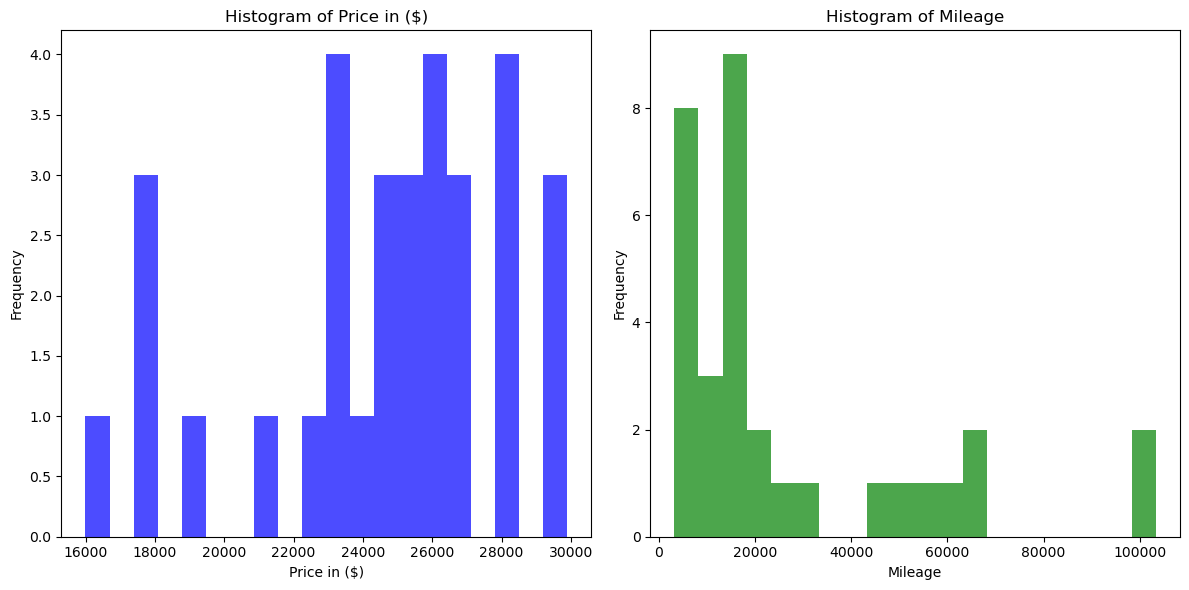

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('Used_Car.csv')

# Remove the "$" sign and convert the "Price" column to float
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Histogram for "Price in ($)"
plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Price in ($)')
plt.xlabel('Price in ($)')
plt.ylabel('Frequency')

# Histogram for "Mileage"
plt.subplot(1, 2, 2)
plt.hist(df['Mileage'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



**Lab 4: Regression**

**We learn some hands-on practice with linear regression.**

**Creating a scatter plot of price vs mileage using the matplotlib library in Python:**

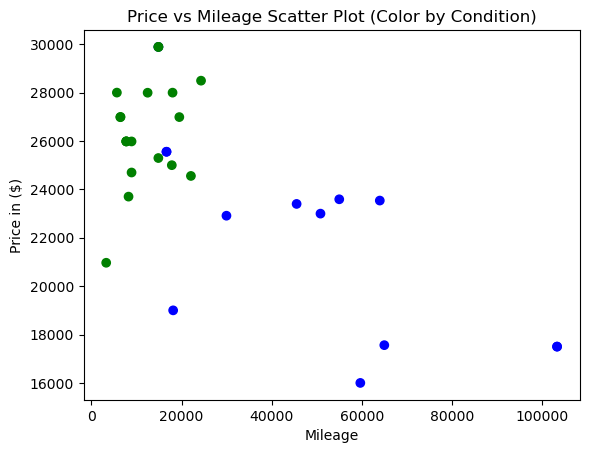

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Used_Car.csv')

# Remove the "$" sign and convert the "Price" column to float
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Define a dictionary that maps condition values to colors
colors = {'Good': 'blue', 'Like New': 'green'}

# Create a scatter plot of Price vs Mileage, with color based on the Condition
plt.scatter(df['Mileage'], df['Price'], c=df['Condition'].apply(lambda x: colors[x]))
plt.xlabel('Mileage')
plt.ylabel('Price in ($)')
plt.title('Price vs Mileage Scatter Plot (Color by Condition)')
plt.show()


**Lab 4: Regression**

**We learn Correlation**

In [20]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Used_Car.csv')

# Remove the "$" sign and convert the "Price" column to float
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Compute the correlation between Price and Mileage
correlation = df['Price'].corr(df['Mileage'])

print(f'Correlation between Price in ($) and Mileage: {correlation}')


Correlation between Price in ($) and Mileage: -0.7055962434981622


## Indicating different groups of cars based on the categorical variable 'Condition' on the scatterplot using different colors, you can use the hue parameter in the scatterplot() function from Seaborn library.

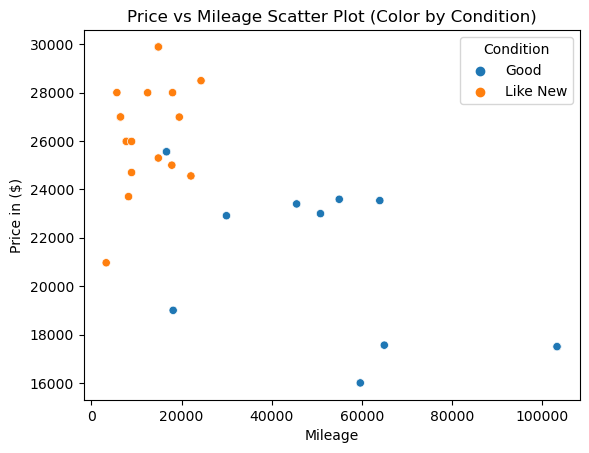

Correlation between Price in ($) and Mileage: -0.7055962434981622


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Used_Car.csv')

# Remove the "$" sign and convert the "Price" column to float
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Plot a scatterplot with hue based on Condition
sns.scatterplot(x='Mileage', y='Price', hue='Condition', data=df)

# Show the plot
plt.xlabel('Mileage')
plt.ylabel('Price in ($)')
plt.title('Price vs Mileage Scatter Plot (Color by Condition)')
plt.show()

# Compute the correlation between Price in ($) and Mileage
correlation = df['Price'].corr(df['Mileage'])
print(f'Correlation between Price in ($) and Mileage: {correlation}')


## The equation of the LS Line (least-squares regression line) price vs mileage.

In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Used_Car.csv')

# Remove the "$" sign and convert the "Price" column to float
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Extract the input (X) and output (y) variables
X = df[['Mileage', 'Price']]
y = df['Price']  # Use the correct column name, which is likely 'Price'

# Create a LinearRegression model and fit it to the data
reg = LinearRegression().fit(X, y)

# Print the slope (regression coefficient) and y-intercept of the least squares line
print('Slope:', reg.coef_[0])
print('Y-intercept:', reg.intercept_)





Slope: -3.2113046580168136e-17
Y-intercept: 7.275957614183426e-12


In [14]:
import pandas as pd
import statsmodels.api as sm

# read the CSV file into a pandas DataFrame
df = pd.read_csv('Used_Car.csv')

# extract the input (X) and output (y) variables
X = df[['Mileage']]
y = df['Price']

# add a constant to the input variables to fit an intercept
X = sm.add_constant(X)

# create a linear regression object and fit it to the data
reg = sm.OLS(y, X).fit()

# print the summary of the regression results
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     29.75
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           6.47e-06
Time:                        18:48:45   Log-Likelihood:                -297.36
No. Observations:                  32   AIC:                             598.7
Df Residuals:                      30   BIC:                             601.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.726e+04    687.358     39.658      0.0

**Lab 4 we learn to interact with an array for a fuction argument and present a dropdown menu of options**

**This menu will give you the correlation of condition of the car Good and Like New.**

In [32]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Used_Car.csv')

# Remove the "$" sign and convert the "Price" column to float
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Create a function to calculate the correlation
def calculate_correlation(condition):
    condition_df = df[df['Condition'] == condition]
    correlation = condition_df['Mileage'].corr(condition_df['Price'])
    return correlation

# Create a dropdown widget for car condition
condition_widget = widgets.Dropdown(
    options=['Good', 'Like New'],
    description='Car Condition:',
    disabled=False,
)

# Create an output widget to display the correlation
output_widget = widgets.Output()

# Define a function to handle the change event of the dropdown
def on_condition_change(change):
    condition = change.new
    correlation = calculate_correlation(condition)
    
    # Clear previous output
    output_widget.clear_output()

    # Display the correlation
    with output_widget:
        print(f'Correlation for {condition} cars:')
        print(f'Correlation coefficient: {correlation}')

# Attach the change event handler to the dropdown
condition_widget.observe(on_condition_change, names='value')

# Display the widgets
display(condition_widget)
display(output_widget)



Dropdown(description='Car Condition:', options=('Good', 'Like New'), value='Good')

Output()

# Display the correlation and the LS of the good condition of th cars.

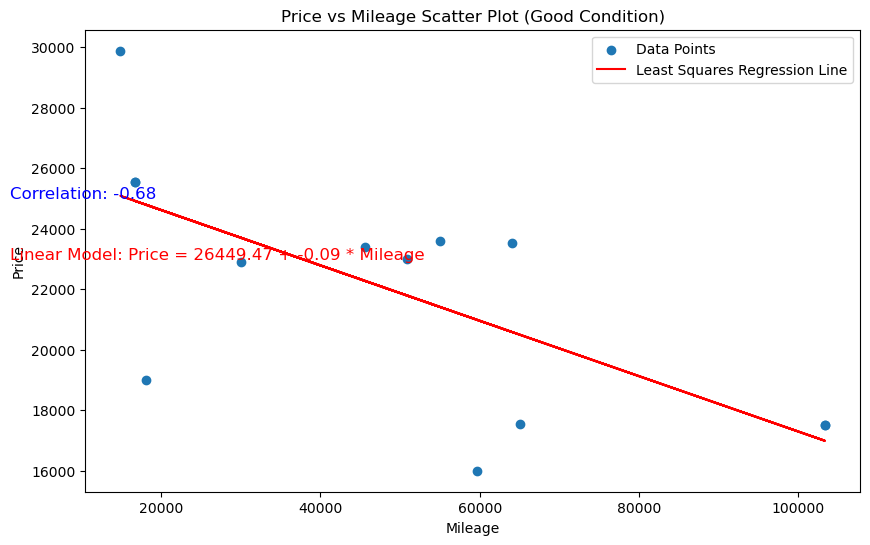

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Used_Car.csv')

# Remove the "$" sign and convert the "Price" column to float
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Filter the DataFrame for cars in "Good" condition
good_condition_df = df[df['Condition'] == 'Good']

# Extract the input (X) and output (y) variables
X = good_condition_df[['Mileage']]
y = good_condition_df['Price']

# Create a LinearRegression model and fit it to the data
reg = LinearRegression().fit(X, y)

# Calculate the correlation coefficient
correlation = good_condition_df['Mileage'].corr(good_condition_df['Price'])

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(good_condition_df['Mileage'], good_condition_df['Price'], label='Data Points')
plt.plot(X, reg.predict(X), color='red', label='Least Squares Regression Line')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs Mileage Scatter Plot (Good Condition)')
plt.legend()

# Display the correlation and linear model
plt.text(1000, 25000, f'Correlation: {correlation:.2f}', fontsize=12, color='blue')
plt.text(1000, 23000, f'Linear Model: Price = {reg.intercept_:.2f} + {reg.coef_[0]:.2f} * Mileage', fontsize=12, color='red')

plt.show()


# Display the correlation and the LS of the like new condition of th cars.

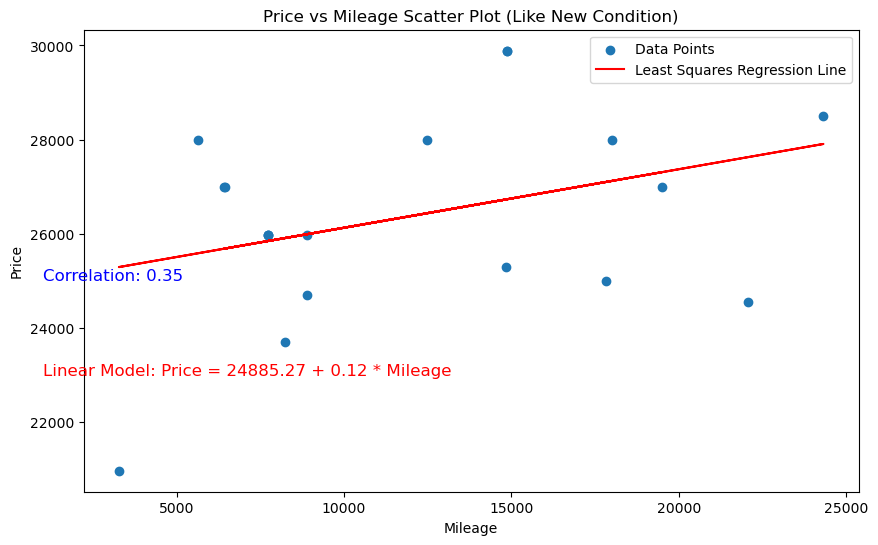

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Used_Car.csv')

# Remove the "$" sign and convert the "Price" column to float
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Filter the DataFrame for cars in "Like New" condition
like_new_condition_df = df[df['Condition'] == 'Like New']

# Extract the input (X) and output (y) variables
X = like_new_condition_df[['Mileage']]
y = like_new_condition_df['Price']

# Create a LinearRegression model and fit it to the data
reg = LinearRegression().fit(X, y)

# Calculate the correlation coefficient
correlation = like_new_condition_df['Mileage'].corr(like_new_condition_df['Price'])

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(like_new_condition_df['Mileage'], like_new_condition_df['Price'], label='Data Points')
plt.plot(X, reg.predict(X), color='red', label='Least Squares Regression Line')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs Mileage Scatter Plot (Like New Condition)')
plt.legend()

# Display the correlation and linear model
plt.text(1000, 25000, f'Correlation: {correlation:.2f}', fontsize=12, color='blue')
plt.text(1000, 23000, f'Linear Model: Price = {reg.intercept_:.2f} + {reg.coef_[0]:.2f} * Mileage', fontsize=12, color='red')

plt.show()


# For example, to predict the price of a car with mileage 29,962 miles, we would calculate:

In [35]:
price = -0.10 * 11121 + 27259.46
print("price of a car with mileage 29962 miles is:", price)

price of a car with mileage 29962 miles is: 26147.36


## Preforming Residual analysis 

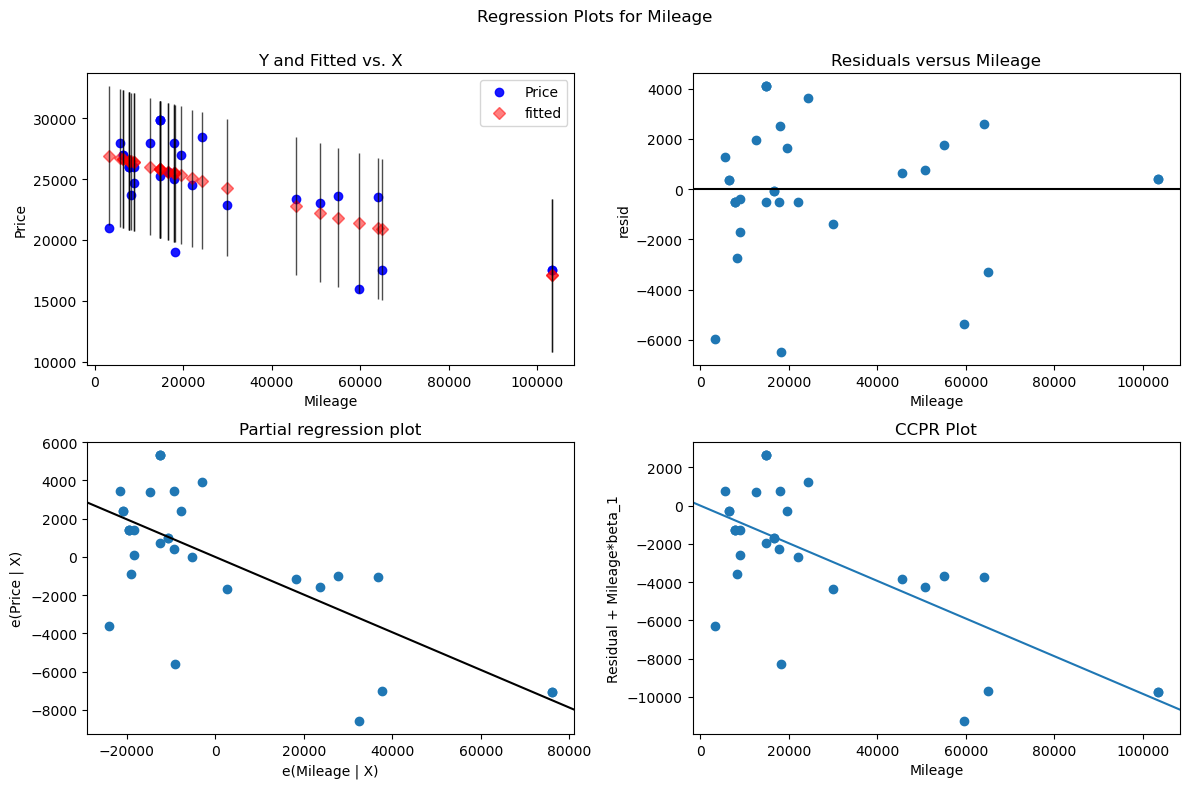

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset into a pandas dataframe
df = pd.read_csv('Used_Car.csv')

# Clean the 'Price' column to remove "$" and ","
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')

# Fit a linear regression model to predict price from mileage
X = sm.add_constant(df['Mileage'])  # Add a constant term to the model
y = df['Price'].astype(float)  # Convert 'Price' to float

# Create and fit a linear regression model
model = sm.OLS(y, X).fit()

# Plot the residual plot
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(model, 'Mileage', fig=fig)
plt.show()


## Compute the residual (prediction error) 

In [49]:
import pandas as pd
import statsmodels.api as sm

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Compute the residuals
residuals = model.resid

# Print the residuals
print(residuals)


0    -6474.945835
1    -2749.024128
2    -1398.011861
3     1648.863515
4     1296.029629
5      622.604512
6     1746.551691
7      -64.291781
8    -5971.351057
9     2579.807461
10    2511.055747
11    4091.752484
12    -515.162086
13     353.770533
14   -5384.087673
15     418.206998
16   -1686.047309
17   -3298.719676
18     -64.291781
19     416.237540
20    4091.752484
21    -515.162086
22    -503.192275
23    3628.502716
24     743.215269
25    -530.568862
26    1963.205394
27    -502.429191
28    4091.752484
29    -515.162086
30     371.088067
31    -401.948836
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     29.75
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           6.47e-06
Time:         

## Compute the residual for 11121 miles.

In [58]:
import pandas as pd
import statsmodels.api as sm

# Load the data from the CSV file
df = pd.read_csv('Used_Car.csv')

# Remove non-numeric characters (dollar sign and spaces) from 'Price' column and convert to float
df['Price'] = df['Price'].str.replace('[$, ]', '', regex=True).astype(float)

# Convert 'Mileage' to float (if it's not already)
df['Mileage'] = df['Mileage'].astype(float)

# Fit the linear regression model
X = df['Mileage']  # Mileage as the independent variable
y = df['Price']    # Price as the dependent variable

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Specify the mileage for which you want to compute the residual
mileage = 11121

# Create a DataFrame with constant and the specified mileage
row = pd.DataFrame({'const': 1, 'Mileage': mileage}, index=[0])

# Predict the price for the specified mileage
predicted_price = model.predict(row)

# Find the nearest mileage value in the dataset to the specified mileage
nearest_mileage = df.iloc[(df['Mileage'] - mileage).abs().argsort()[:1]]['Mileage'].values[0]

# Use the actual price value for the record with the nearest mileage
actual_price = df.loc[df['Mileage'] == nearest_mileage, 'Price'].values[0]

# Compute the residual
residual = actual_price - predicted_price[0]

# Print the residual
print(f"Residual for mileage {mileage}: {residual}")




Residual for mileage 11121: 1830.6609203403823


## Compute the coefficient of determination 

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Load the data from a CSV file
df = pd.read_csv('Used_Car.csv')

# Clean the 'Price' column and convert it to a float
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Extract the independent variable (Mileage) and the dependent variable (Price)
X = df['Mileage'].values.reshape(-1, 1)
y = df['Price']

# Create and fit the linear regression model
model = LinearRegression().fit(X, y)

# Compute the R-squared score
r_squared = model.score(X, y)

# Print the R-squared score
print(f"R-squared: {r_squared:.2f}")



R-squared: 0.50


# Residial Plot

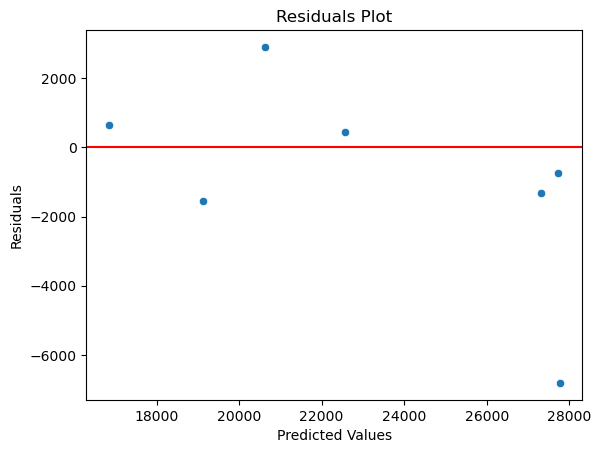

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data into a pandas dataframe
df = pd.read_csv('Used_Car.csv')

# Clean the 'Price' column and convert it to a numeric format
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Select the features and target variable
X = df[['Mileage', 'Year']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


## Confidence Interval for the price of a use car.

In [70]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the data into a pandas dataframe
df = pd.read_csv('Used_Car.csv')

# Clean the 'Price' column by removing dollar signs and commas and converting to numeric
df['Price'] = df['Price'].str.replace('[$,]', '', regex=True).astype(float)

# Calculate the mean price
mean_price = np.mean(df['Price'])

# Set the confidence level (e.g., 95%)
conf_level = 0.95

# Calculate the standard error of the mean
std_error = stats.sem(df['Price'])

# Calculate the margin of error
margin_error = std_error * stats.t.ppf((1 + conf_level) / 2, len(df) - 1)

# Calculate the confidence interval
conf_interval = (mean_price - margin_error, mean_price + margin_error)

# Print the results
print(f"Mean Price: ${mean_price:.2f}")
print(f"Confidence Interval ({conf_level*100}%): $({conf_interval[0]:.2f}, {conf_interval[1]:.2f})")


Mean Price: $24573.75
Confidence Interval (95.0%): $(23215.97, 25931.53)


# Hypothesis Testing mean is $25,175.

In [74]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the data into a pandas dataframe
df = pd.read_csv('Used_Car.csv')

# Clean the 'Price' column to remove commas and dollar signs and convert to float
df['Price'] = df['Price'].str.replace(',', '').str.replace('$', '').astype(float)

# Set the null hypothesis
mu_null = 25175

# Calculate the sample mean and standard deviation
sample_mean = np.mean(df['Price'])
sample_std = np.std(df['Price'], ddof=1)

# Set the significance level
alpha = 0.05

# Calculate the t-statistic and p-value for a one-sided test
t_stat, p_val = stats.ttest_1samp(df['Price'], mu_null, alternative='less')

# Print the results
print("Sample Mean: ${:.2f}".format(sample_mean))
print("Sample Standard Deviation: ${:.2f}".format(sample_std))
print("Null Hypothesis (mu_null): ${}".format(mu_null))
print("Significance Level (alpha):", alpha)
print("T-Statistic:", t_stat)
print("P-Value:", p_val)

# Determine if the null hypothesis is rejected
if p_val < alpha:
    print("Null Hypothesis Rejected.")
else:
    print("Null Hypothesis Not Rejected.")


Sample Mean: $24573.75
Sample Standard Deviation: $3765.97
Null Hypothesis (mu_null): $25175
Significance Level (alpha): 0.05
T-Statistic: -0.9031357470640062
P-Value: 0.18670924986321225
Null Hypothesis Not Rejected.


<img src="https://media.giphy.com/media/XtdLpKOzoxJCzlFY4n/giphy.gif">

<font color=Blue>**Instructor:** Edward Pineda-Castro, Los Angeles City College </font>

<font color=Blue>  Math 229 Statistics for Data Science Lecuture Notes  </font> 